<a href="https://colab.research.google.com/github/anindyaroy/learnAgenticAI/blob/main/M7_Multimodal_Prompt_Engineering_with_OpenAI_GPT_4o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multimodal Prompt Engineering with OpenAI GPT-4o

GPT-4o ("o" for "omni") is designed to handle a combination of text, audio, and video inputs, and can generate outputs in text, audio, and image formats.


### Background

Before GPT-4o, users could interact with ChatGPT using Voice Mode, which operated with three separate models. GPT-4o will integrate these capabilities into a single model that's trained across text, vision, and audio. This unified approach ensures that all inputs—whether text, visual, or auditory—are processed cohesively by the same neural network.


### Current API Capabilities

Currently, the API supports `{text, image}` inputs only, with `{text}` outputs, the same modalities as `gpt-4-turbo`. Additional modalities, including audio, will be introduced soon. This guide will help you get started with using GPT-4o for text, image, and video understanding.


## Getting Started

### Install OpenAI SDK for Python



In [ ]:
!pip install openai==1.55.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.6/389.6 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.54.5
    Uninstalling openai-1.54.5:
      Successfully uninstalled openai-1.54.5


## Enter API Tokens

In [ ]:
from getpass import getpass

OPENAI_KEY = getpass('Enter Open AI API Key:')

Enter Open AI API Key:··········


In [ ]:
import os

os.environ['OPENAI_API_KEY'] = OPENAI_KEY

In [ ]:
from openai import OpenAI
import os

## Set the API key and model name
MODEL="gpt-4o"
client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))

In [ ]:
completion = client.chat.completions.create(
  model=MODEL,
  messages=[
    {"role": "system", "content": "You are a helpful assistant. Help me with my math homework!"}, # <-- This is the system message that provides context to the model
    {"role": "user", "content": "Hello! Could you solve 2+2?"}  # <-- This is the user message for which the model will generate a response
  ]
)

print("Assistant: " + completion.choices[0].message.content)

Assistant: Hello! Of course, 2 + 2 equals 4.


In [ ]:
from IPython.display import Markdown

Markdown(completion.choices[0].message.content)

Hello! Of course, 2 + 2 equals 4.

## Image Processing
GPT-4o can directly process images and take intelligent actions based on the image. We can provide images in two formats:
1. Base64 Encoded
2. URL

Let's first view the image we'll use, then try sending this image as both Base64 and as a URL link to the API

In [ ]:
!curl -o triangle.png https://upload.wikimedia.org/wikipedia/commons/e/e2/The_Algebra_of_Mohammed_Ben_Musa_-_page_82b.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8037  100  8037    0     0  27836      0 --:--:-- --:--:-- --:--:-- 27906


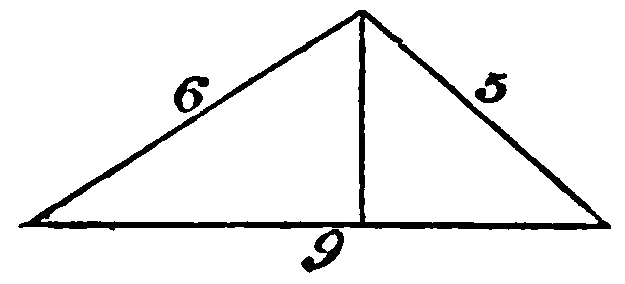

In [ ]:
from IPython.display import Image, display, Audio, Markdown
import base64

IMAGE_PATH = "./triangle.png"

# Preview image for context
display(Image(IMAGE_PATH))

#### Base64 Image Processing

In [ ]:
# Open the image file and encode it as a base64 string
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

base64_image = encode_image(IMAGE_PATH)

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with my math homework!"},
        {"role": "user", "content": [
            {"type": "text", "text": "What's the area of the triangle?"},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"}
            }
        ]}
    ],
    temperature=0.0,
)

display(Markdown(response.choices[0].message.content))

To find the area of the triangle, we can use Heron's formula. First, we need to find the semi-perimeter \( s \) of the triangle:

\[
s = \frac{a + b + c}{2} = \frac{6 + 5 + 9}{2} = 10
\]

Now, apply Heron's formula:

\[
\text{Area} = \sqrt{s(s-a)(s-b)(s-c)}
\]

Substitute the values:

\[
\text{Area} = \sqrt{10(10-6)(10-5)(10-9)}
\]

\[
= \sqrt{10 \times 4 \times 5 \times 1}
\]

\[
= \sqrt{200}
\]

\[
= \sqrt{100 \times 2}
\]

\[
= 10\sqrt{2}
\]

So, the area of the triangle is \( 10\sqrt{2} \) square units.

To find the area of the triangle, we can use Heron's formula.

First, we need to find the semi-perimeter of the triangle.

The sides of the triangle are 6, 5, and 9.

Calculate the semi-perimeter $( s ): [ s = \frac{a + b + c}{2} = \frac{6 + 5 + 9}{2} = 10 ]$

Use Heron's formula to find the area $( A )$

$: [ A = \sqrt{s(s-a)(s-b)(s-c)} ]$

$[ A = \sqrt{10(10-6)(10-5)(10-9)} ]$

$[ A = \sqrt{10 \cdot 4 \cdot 5 \cdot 1} ]$

$[ A = \sqrt{200} ]$

$[ A = 10\sqrt{2} ]$

So, the area of the triangle is $( 10\sqrt{2} )$ square units.

#### URL Image Processing

In [ ]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with my math homework!"},
        {"role": "user", "content": [
            {"type": "text", "text": "What's the area of the triangle?"},
            {"type": "image_url", "image_url": {
                "url": "https://upload.wikimedia.org/wikipedia/commons/e/e2/The_Algebra_of_Mohammed_Ben_Musa_-_page_82b.png"}
            }
        ]}
    ],
    temperature=0.0,
)

display(Markdown(response.choices[0].message.content))

To find the area of the triangle, we can use Heron's formula. First, we need to find the semi-perimeter \( s \) of the triangle:

\[
s = \frac{a + b + c}{2} = \frac{6 + 5 + 9}{2} = 10
\]

Now, apply Heron's formula:

\[
\text{Area} = \sqrt{s(s-a)(s-b)(s-c)}
\]

Substitute the values:

\[
\text{Area} = \sqrt{10(10-6)(10-5)(10-9)}
\]

\[
= \sqrt{10 \times 4 \times 5 \times 1}
\]

\[
= \sqrt{200}
\]

\[
= \sqrt{100 \times 2}
\]

\[
= 10\sqrt{2}
\]

So, the area of the triangle is \( 10\sqrt{2} \) square units.

In [ ]:
! curl -o clinical_note.png https://i.imgur.com/AJwKUEb.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  106k  100  106k    0     0   643k      0 --:--:-- --:--:-- --:--:--  645k


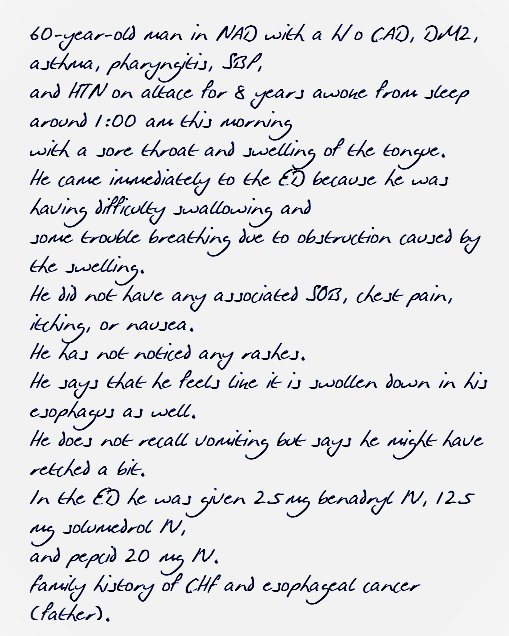

In [ ]:
IMAGE_PATH = "./clinical_note.png"

# Preview image for context
display(Image(IMAGE_PATH))

In [ ]:
base64_image = encode_image(IMAGE_PATH)

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": """Act as an expert in analyzing and understanding handwritten clinical notes.
                                         Detect the handwriting in the clinical note and perform tasks as per the user
                                      """},
        {"role": "user", "content": [
            {"type": "text",
             "text": """Extract all symptoms from the given clinical note image.
                        Differentiate between symptoms that are present vs. absent.
                        Give me the probability (high/ medium/ low) of how sure you are about the result.
                        Add a note on the probabilities and why you think so.

                        Output as a markdown table with the following columns,
                        all symptoms should be expanded and no acronyms unless you don't know:

                        Symptoms | Present/Denies | Probability.

                        Also expand all acronyms.
                        Output that also as a separate appendix table in Markdown.
                        Do not make up terms, if something is not detectable leave it out.
                     """},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"}
            }
        ]}
    ],
    temperature=0.0,
)

display(Markdown(response.choices[0].message.content))

### Symptoms Table

| Symptoms                  | Present/Denies | Probability |
|---------------------------|----------------|-------------|
| Sore throat               | Present        | High        |
| Swelling of the tongue    | Present        | High        |
| Difficulty swallowing     | Present        | High        |
| Trouble breathing         | Present        | High        |
| Shortness of breath       | Denies         | High        |
| Chest pain                | Denies         | High        |
| Itching                   | Denies         | High        |
| Nausea                    | Denies         | High        |
| Rashes                    | Denies         | High        |
| Vomiting                  | Denies         | Medium      |
| Feeling of swelling in esophagus | Present | Medium      |

### Probability Note

- **High Probability**: The symptoms are clearly mentioned in the note with no ambiguity.
- **Medium Probability**: The symptom of vomiting is less certain as the patient mentions he "might have retched a bit," indicating uncertainty. The feeling of swelling in the esophagus is subjective and less definitive.

### Appendix Table

| Acronym | Expansion                      |
|---------|--------------------------------|
| NAD     | No Acute Distress              |
| CAD     | Coronary Artery Disease        |
| DM2     | Diabetes Mellitus Type 2       |
| SOB     | Shortness of Breath            |
| ED      | Emergency Department           |
| HTN     | Hypertension                   |
| CHF     | Congestive Heart Failure       |
| IV      | Intravenous                    |

In [ ]:
! curl -o hwrite.png https://i.imgur.com/XWeRd8a.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2852k  100 2852k    0     0  3520k      0 --:--:-- --:--:-- --:--:-- 3517k


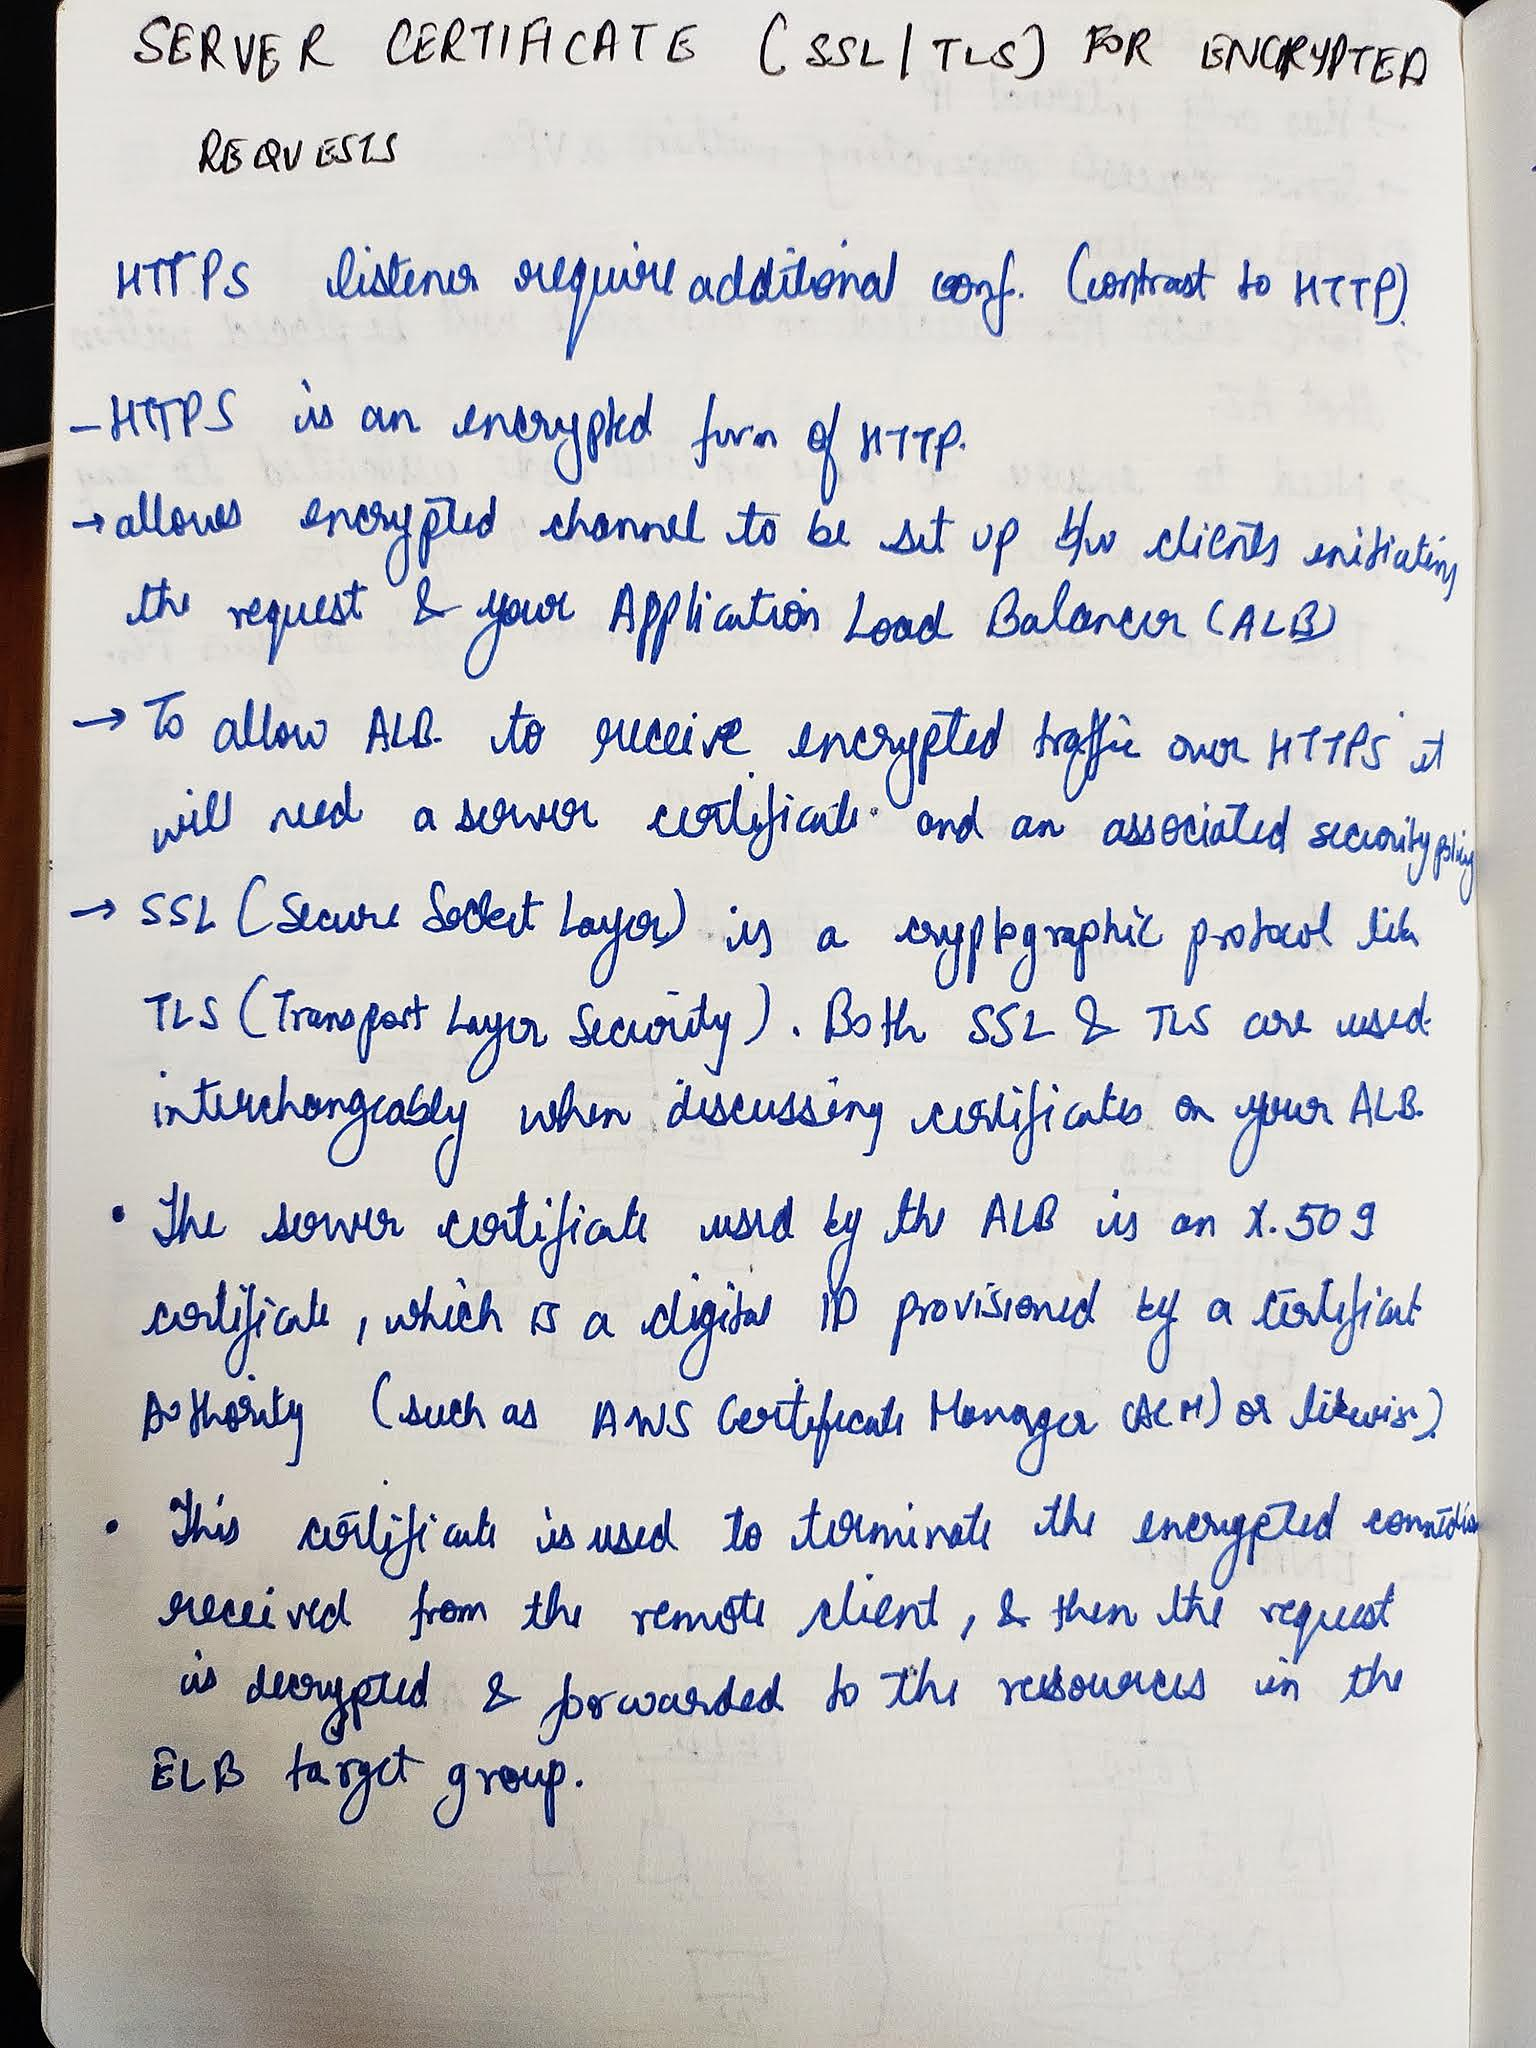

In [ ]:
IMAGE_PATH = "./hwrite.png"

# Preview image for context
display(Image(IMAGE_PATH))

In [ ]:
MODEL

'gpt-4o'

In [ ]:
base64_image = encode_image(IMAGE_PATH)

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "Act as handwriting expert, detect the handwriting in the documents and perform tasks as per the user"},
        {"role": "user", "content": [
            {"type": "text",
             "text": """Convert the handwritten document into text exactly as in the image,
                        do not make up words, if something is not detectable just put [NOT_EXTRACTED]
                     """},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"}
            }
        ]}
    ],
    temperature=0.0,
)

Markdown(response.choices[0].message.content)

SERVER CERTIFICATE (SSL/TLS) FOR ENCRYPTED REQUESTS

- HTTPS listeners require additional conf. (Contrast to HTTP)

- HTTPS is an encrypted form of HTTP.

- allows encrypted channel to be set up b/w clients initiating the request & your Application Load Balancer (ALB)

-> To allow ALB to receive encrypted traffic over HTTPS it will need a server certificate and an associated security [NOT_EXTRACTED]

- SSL (Secure Socket Layer) is a cryptographic protocol like TLS (Transport Layer Security). Both SSL & TLS can used interchangeably when discussing certificates on your ALB.

- The server certificate used by the ALB is an X.509 certificate, which is a digital ID provisioned by a certificate authority (such as AWS Certificate Manager (ACM) or likewise)

- This certificate is used to terminate the encrypted connection received from the remote client, & then the request is decrypted & forwarded to the resources in the ELB target group.

In [ ]:
!curl -o sales.png https://i.imgur.com/jH3MNNP.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  369k  100  369k    0     0  1703k      0 --:--:-- --:--:-- --:--:-- 1710k


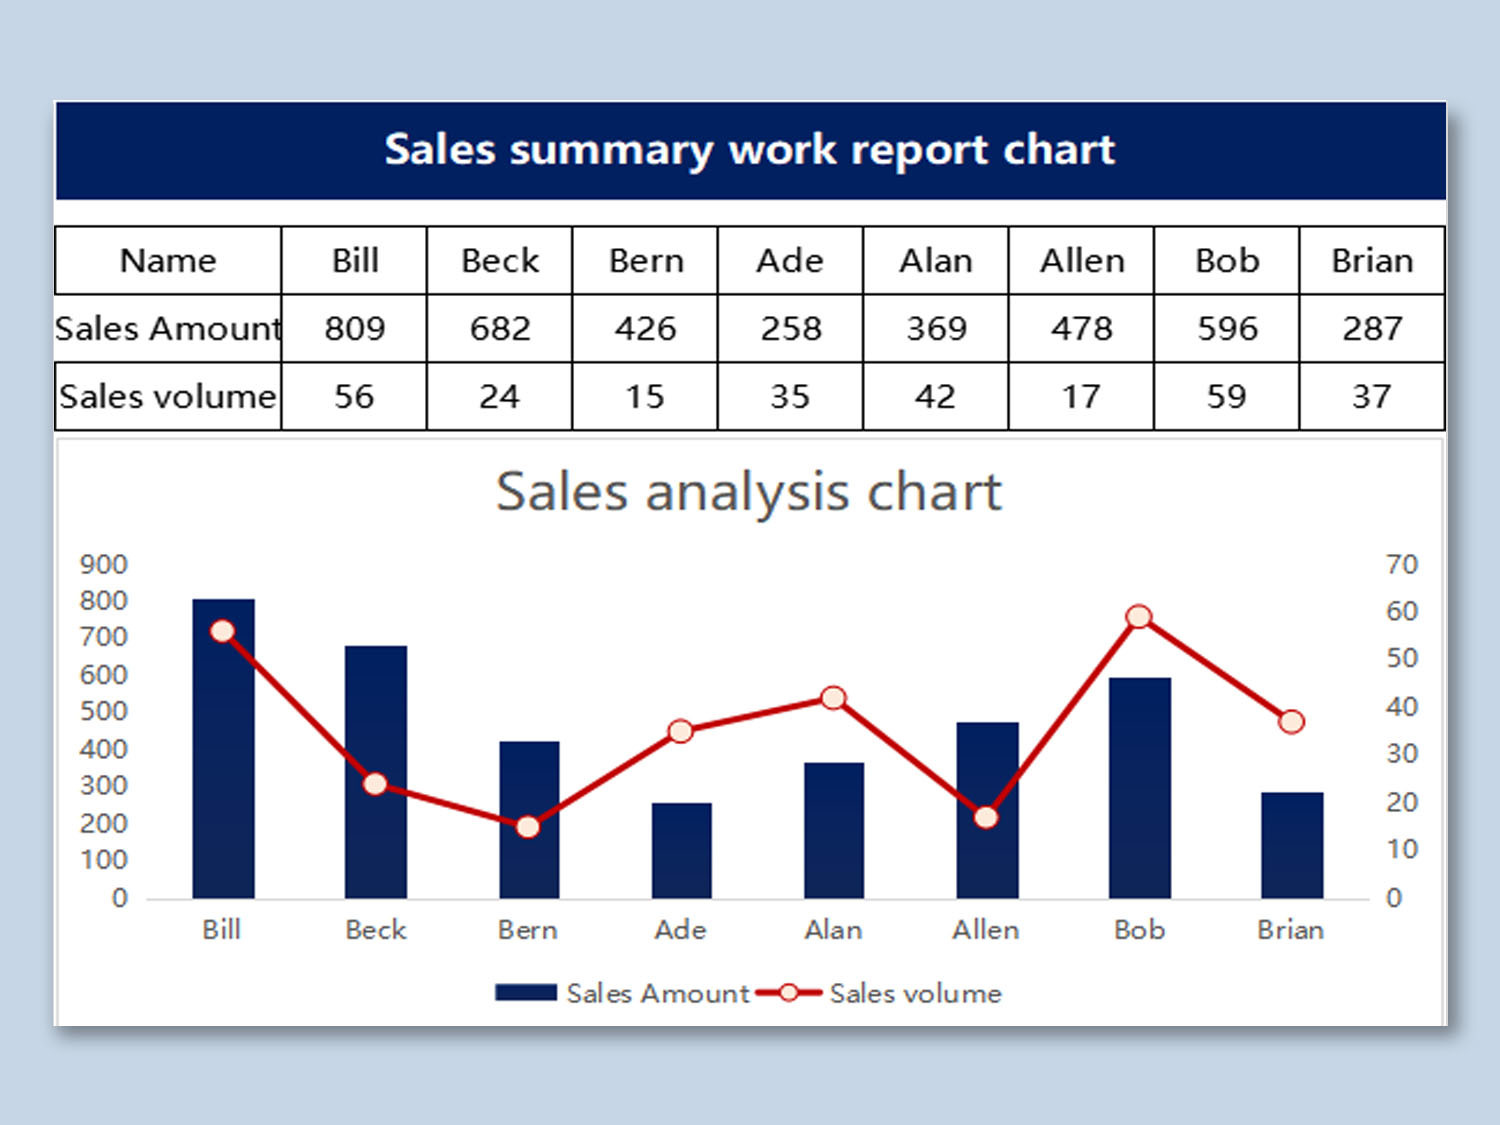

In [ ]:
IMAGE_PATH = "./sales.png"

# Preview image for context
display(Image(IMAGE_PATH))

In [ ]:
base64_image = encode_image(IMAGE_PATH)

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "Act as a data analyst, your job is to analyze visuals and give insights"},
        {"role": "user", "content": [
            {"type": "text",
             "text": """Given this sales report visualization, summarize it briefly,
                        give detailed statistics about the top 3 best performing salesmen
                     """},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"}
            }
        ]}
    ],
    temperature=0.0,
)

Markdown(response.choices[0].message.content)

The sales report visualization provides a summary of sales performance for several salesmen, highlighting both sales amount and sales volume. 

### Top 3 Best Performing Salesmen:

1. **Bill**
   - **Sales Amount:** 809
   - **Sales Volume:** 56

2. **Beck**
   - **Sales Amount:** 682
   - **Sales Volume:** 24

3. **Bob**
   - **Sales Amount:** 596
   - **Sales Volume:** 59

Bill leads in both sales amount and volume, indicating strong overall performance. Beck has a high sales amount but a lower volume, suggesting higher-value sales. Bob has a high sales volume, indicating frequent transactions.

In [ ]:
# download images using curl
!curl https://i.imgur.com/6b9jwkk.png -o image1.png
!curl https://i.imgur.com/9CWuU2q.png -o image2.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  341k  100  341k    0     0  1916k      0 --:--:-- --:--:-- --:--:-- 1919k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  347k  100  347k    0     0  2175k      0 --:--:-- --:--:-- --:--:-- 2183k


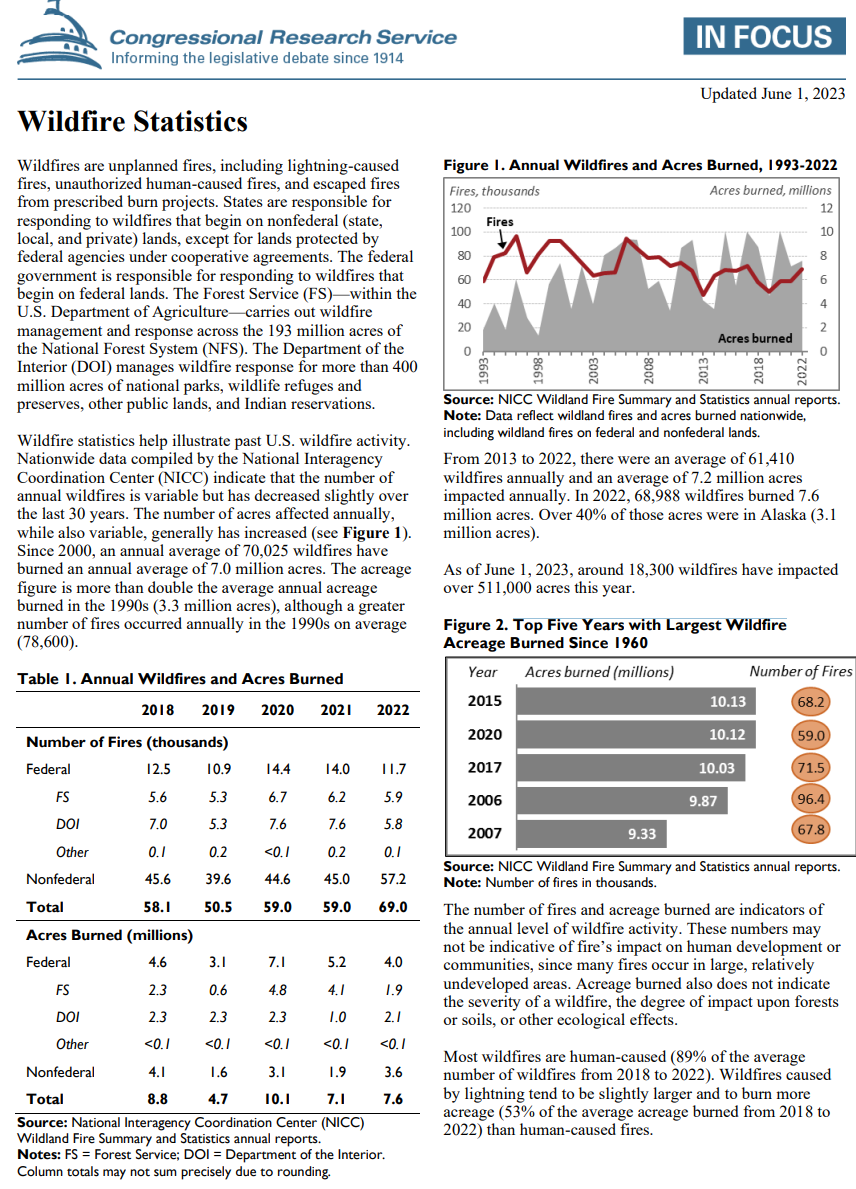

In [ ]:
display(Image('image1.png'))

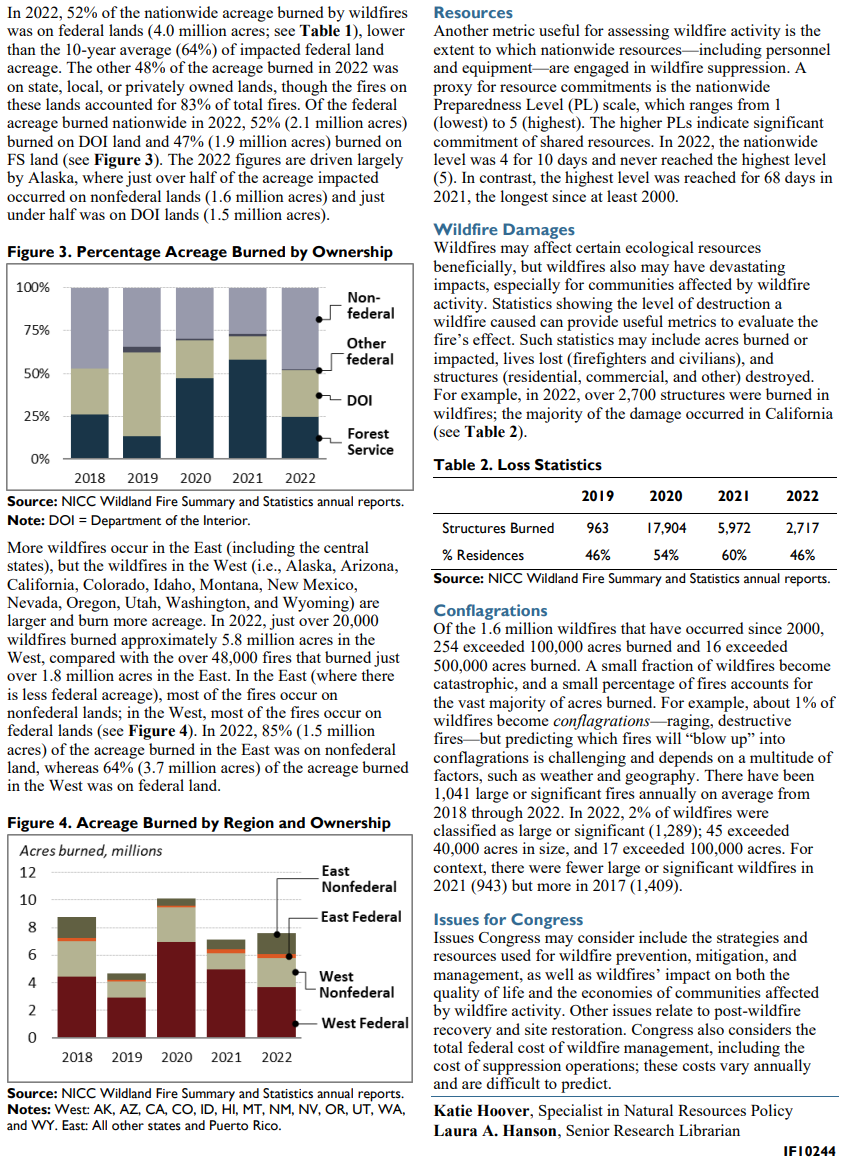

In [ ]:
display(Image('image2.png'))

In [ ]:
base64_image1 = encode_image('./image1.png')
base64_image2 = encode_image('./image2.png')

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "Act as an analyst, your job is to analyze document scans and give insights"},
        {"role": "user", "content": [
            {"type": "text",
             "text": """Given the following images which can contain graphs, tables and text,
                        analyze all of them to answer the following questions:

                        - Tell me about the top 5 years with largest Wildfires
                        - Tell me about trend of wildfires in terms of acreage burned by region and ownership
                     """},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image1}"}
            },
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image2}"}
            }
        ]}
    ],
    temperature=0.0,
)

Markdown(response.choices[0].message.content)

### Top 5 Years with Largest Wildfires

The top five years with the largest wildfire acreage burned since 1960 are:

1. **2015**: 10.13 million acres
2. **2020**: 10.12 million acres
3. **2017**: 9.98 million acres
4. **2012**: 9.87 million acres
5. **2006**: 9.33 million acres

### Trend of Wildfires in Terms of Acreage Burned by Region and Ownership

#### By Ownership:
- **Federal Lands**: In 2022, 52% of the nationwide acreage burned was on federal lands, which is lower than the 10-year average of 64%.
  - **Forest Service (FS)**: In 2022, 47% of the acreage burned was on FS land.
  - **Department of the Interior (DOI)**: In 2022, 52% of the acreage burned was on DOI land.

#### By Region:
- **West**: In 2022, approximately 5.8 million acres burned in the West, with most fires occurring on federal lands.
- **East**: Over 1.8 million acres burned in the East, with most fires occurring on nonfederal lands.

#### General Trends:
- The number of wildfires has decreased slightly over the past 30 years, but the acreage affected has generally increased.
- Most wildfires are human-caused, with lightning-caused fires tending to be larger and burn more acreage.
- In 2022, a significant portion of the acreage burned was in Alaska, with over half of the acreage impacted occurring on nonfederal lands.

These trends indicate a shift in wildfire patterns, with federal lands experiencing a decrease in the percentage of total acreage burned, while nonfederal lands have seen an increase. The West continues to experience larger and more frequent wildfires compared to the East.

## Video Processing
While it's not possible to directly send a video to the API, GPT-4o can understand videos if you sample frames and then provide them as images. It performs better at this task than GPT-4 Turbo.

Since GPT-4o in the API does not yet support video directly and audio is in beta (as of November-December 2024), we'll use a combination of GPT-4o and Whisper to process both the audio and we will manually convert the video into a list of image frames, and showcase two usecases:
1. Summarization
2. Question and Answering



### Setup for Video Processing
We'll use two python packages for video processing - opencv-python and moviepy.

These require [ffmpeg](https://ffmpeg.org/about.html), so make sure to install this beforehand. Depending on your OS, you may need to run `brew install ffmpeg` or `sudo apt install ffmpeg`

In [ ]:
!pip install opencv-python --quiet
!pip install moviepy --quiet

### Process the video into two components: frames and audio

In [ ]:
!gdown -O 'keynote_recap.mp4' '1s6WOK3w1hJxcxE7T_WWZFioFGE81uKLb'

Downloading...
From: https://drive.google.com/uc?id=1s6WOK3w1hJxcxE7T_WWZFioFGE81uKLb
To: /content/keynote_recap.mp4
100% 8.52M/8.52M [00:00<00:00, 140MB/s]


In [ ]:
import cv2
from moviepy.editor import VideoFileClip
import time
import base64

# We'll be using the OpenAI DevDay Keynote Recap video. You can review the video here: https://www.youtube.com/watch?v=h02ti0Bl6zk
VIDEO_PATH = "./keynote_recap.mp4"

  if event.key is 'enter':



In [ ]:
import os
import cv2
import base64
from moviepy.editor import VideoFileClip

def process_video(video_path, seconds_per_frame=2):
    # Initialize a list to store base64 encoded frames
    base64Frames = []
    # Extract the base name of the video file without extension
    base_video_path, _ = os.path.splitext(video_path)
    # Open the video file
    video = cv2.VideoCapture(video_path)

    # Get the total number of frames and the frames per second (fps) of the video
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = video.get(cv2.CAP_PROP_FPS)
    # Calculate the number of frames to skip between samples
    frames_to_skip = int(fps * seconds_per_frame)

    # Start from the first frame
    curr_frame = 0
    # Loop through the video to extract frames at the specified interval
    while curr_frame < total_frames - 1:
        # Set the current frame position in the video
        video.set(cv2.CAP_PROP_POS_FRAMES, curr_frame)
        # Read the frame
        success, frame = video.read()
        if not success:
            break
        # Encode the frame as a JPEG image and convert it to base64
        _, buffer = cv2.imencode(".jpg", frame)
        base64Frames.append(base64.b64encode(buffer).decode("utf-8"))
        # Move to the next frame based on the sampling interval
        curr_frame += frames_to_skip
    # Release the video object
    video.release()

    # Extract audio from the video
    audio_path = f"{base_video_path}.mp3"
    clip = VideoFileClip(video_path)
    clip.audio.write_audiofile(audio_path, bitrate="32k")  # Save audio with reduced bitrate
    clip.audio.close()
    clip.close()

    print(f"Extracted {len(base64Frames)} frames")
    print(f"Extracted audio to {audio_path}")
    # Return the frames as base64 strings and the path to the audio file
    return base64Frames, audio_path

# Example usage
# Extract 1 frame for every 3 seconds from the video
base64Frames, audio_path = process_video(VIDEO_PATH, seconds_per_frame=3)

MoviePy - Writing audio in ./keynote_recap.mp3


MoviePy - Done.
Extracted 72 frames
Extracted audio to ./keynote_recap.mp3


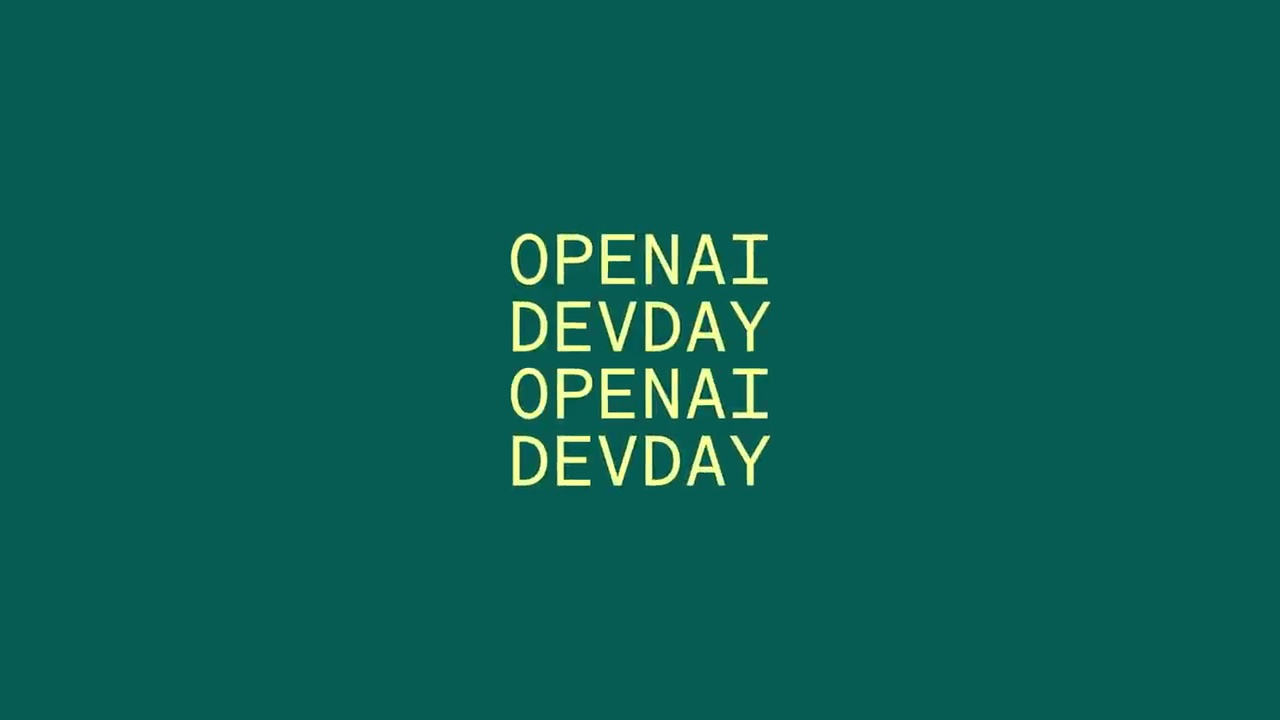

In [ ]:
## Display the frames and audio for context
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8")), width=600))
    time.sleep(0.5)

Audio(audio_path)

In [ ]:
len(base64Frames)

72

In [ ]:
base64Frames[55]

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCALQBQADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD8Q6Kkor5c9Qr0VJRVcwFeipKKoCvUdWKjrSMhNXK9FSUVoQMT7wqWL/WCok+8Kli/1gpPY7KHUmooorA6AooorQAooooAKKKKACiiigAooooAp0UUVoBYoqnRVcoFyiqdFHKBJRRRUgFFFFABRRRQAUUUUAFFO8qT+7+tHlS

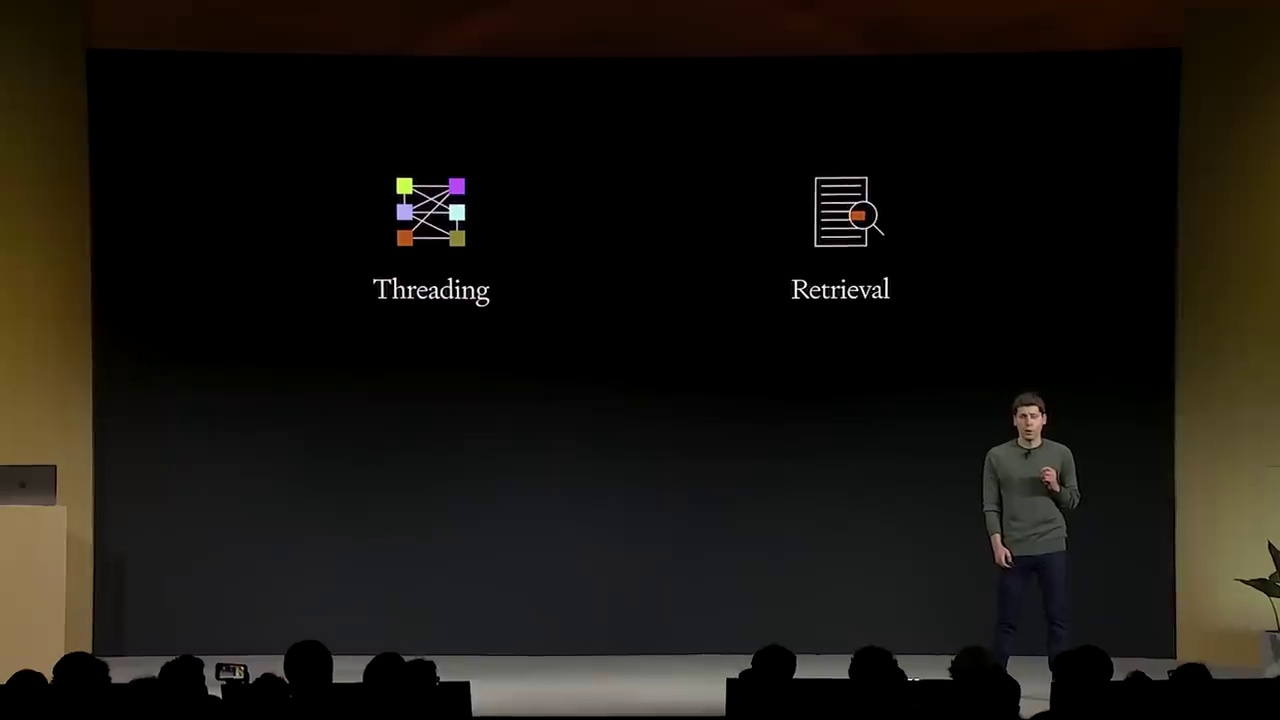

In [ ]:
Image(data=base64.b64decode(base64Frames[55].encode("utf-8")), width=600)

### Example 1: Summarization
Now that we have both the video frames and the audio, let's run a few different tests to generate a video summary to compare the results of using the models with different modalities. We should expect to see that the summary generated with context from both visual and audio inputs will be the most accurate, as the model is able to use the entire context from the video.

1. Visual Summary
2. Audio Summary
3. Visual + Audio Summary

#### Visual Summary
The visual summary is generated by sending the model only the frames from the video. With just the frames, the model is likely to capture the visual aspects, but will miss any details discussed by the speaker.

In [ ]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system",
     "content": """You are generating a video summary.
                   Create a detailed summary of the provided video with key bullet points.
                   Respond in Markdown.
                """},
    {"role": "user", "content": [
        "These are the frames from the video.",
        *map(lambda x: {"type": "image_url",
                        "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames)
        ],
    }
    ],
    temperature=0,
)
Markdown(response.choices[0].message.content)

### Video Summary: OpenAI DevDay

- **Introduction:**
  - The event is titled "OpenAI DevDay."
  - The venue is set up for a large audience, indicating a significant event.

- **Presentation Highlights:**
  - The speaker introduces "GPT-4 Turbo," highlighting advancements in AI technology.
  - Key features discussed include increased context length, more control, and better knowledge.
  - A demonstration of JSON mode is shown, indicating new functionalities.

- **Technological Advancements:**
  - Mention of "DALL-E 3," "GPT-4 Turbo with Vision," and "TTS" (Text-to-Speech).
  - Introduction of custom models, allowing for tailored AI solutions.
  - Emphasis on improved token processing speed and efficiency.

- **Pricing and Accessibility:**
  - Discussion on "GPT-4 Turbo Pricing," highlighting cost efficiency with reduced input and output tokens.

- **New Features and Tools:**
  - Introduction of "GPTs" with various applications like study buddies, language tutors, and more.
  - Focus on building with natural language, making AI more accessible to developers.

- **Technical Capabilities:**
  - Features like threading, retrieval, code interpreter, and function calling are showcased.

- **Conclusion:**
  - The event wraps up with a focus on innovation and future possibilities in AI development.
  - The speaker concludes with a positive note, engaging with the audience.

- **Visual Elements:**
  - The presentation includes dynamic visuals and animations, enhancing the engagement.

This summary captures the key points and themes presented during the OpenAI DevDay event.

The results are as expected - the model is able to capture the high level aspects of the video visuals, but misses the details provided in the speech.

#### Audio Summary
The audio summary is generated by sending the model the audio transcript. With just the audio, the model is likely to bias towards the audio content, and will miss the context provided by the presentations and visuals.

`{audio}` input for GPT-4o is in beta access via its realtime API but hopefully we see it in a stable release in 2025! For now, we use our existing `whisper-1` model to process the audio

In [ ]:
# Transcribe the audio
transcription = client.audio.transcriptions.create(
    model="whisper-1",
    file=open(audio_path, "rb"),
)
## OPTIONAL: Uncomment the line below to print the transcription
print("Transcript: ", transcription.text[:1000] + "\n\n")

Transcript:  Welcome to our first-ever OpenAI Dev Day. Today, we are launching a new model, GPT-4 Turbo. GPT-4 Turbo supports up to 128,000 tokens of context. We have a new feature called JSON mode, which ensures that the model will respond with valid JSON. You can now call many functions at once, and it'll do better at following instructions in general. You want these models to be able to access better knowledge about the world. So do we. So we're launching retrieval in the platform. You can bring knowledge from outside documents or databases into whatever you're building. GPT-4 Turbo has knowledge about the world up to April of 2023, and we will continue to improve that over time. Dolly 3, GPT-4 Turbo with Vision, and the new Text-to-Speech model are all going into the API today. Today, we're launching a new program called Custom Models. With Custom Models, our researchers will work closely with the company to help them make a great custom model, especially for them and their use cas

In [ ]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system",
     "content":"""You are generating a transcript summary.
                  Create a detailed summary of the provided transcription with key bullet points.
                  Respond in Markdown.
               """},
    {"role": "user", "content": [
        {"type": "text", "text": f"The audio transcription is: {transcription.text}"}
        ],
    }
    ],
    temperature=0,
)
Markdown(response.choices[0].message.content)

### OpenAI Dev Day Key Announcements

- **Launch of GPT-4 Turbo:**
  - New model introduced with support for up to 128,000 tokens of context.
  - Features a JSON mode to ensure responses are valid JSON.
  - Improved ability to call multiple functions simultaneously and follow instructions.

- **Retrieval Feature:**
  - Allows integration of external knowledge from documents or databases into applications.

- **Model Knowledge:**
  - GPT-4 Turbo's knowledge is current up to April 2023, with ongoing updates planned.

- **New Tools and Models:**
  - Dolly 3, GPT-4 Turbo with Vision, and a new Text-to-Speech model are now available via API.

- **Custom Models Program:**
  - OpenAI researchers will collaborate with companies to create tailored models for specific use cases.
  - Offers higher rate limits and the ability to request changes to rate limits and quotas.

- **Cost Efficiency:**
  - GPT-4 Turbo is significantly cheaper than GPT-4, with a 3x reduction in cost for prompt tokens and 2x for completion tokens.

- **Introduction of GPTs:**
  - Tailored versions of ChatGPT designed for specific purposes.
  - Can be programmed through conversation, without coding.
  - Options to create private GPTs or share publicly, with enterprise options for company-specific GPTs.
  - Launch of the GPT Store later this month.

- **API Enhancements:**
  - Assistance API includes persistent threads, built-in retrieval, a code interpreter, and improved function calling.

- **Vision for the Future:**
  - Emphasis on integrating intelligence into various applications to provide "superpowers on demand."
  - Encouragement for developers to innovate with the new technology.

- **Closing Remarks:**
  - Anticipation for future advancements and an invitation to return for next year's developments.

The audio summary is biased towards the content discussed during the speech, but comes out with much less structure than the video summary.

#### Audio + Visual Summary
The Audio + Visual summary is generated by sending the model both the visual and the audio from the video at once. When sending both of these, the model is expected to better summarize since it can perceive the entire video at once.

In [ ]:
## Generate a summary with visual and audio
response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system",
     "content":"""You are generating a video summary.
                  Create a detailed summary of the provided video and its transcript with key bullet points.
                  Respond in Markdown
               """},
    {"role": "user", "content": [
        "These are the frames from the video.",
        *map(lambda x: {"type": "image_url",
                        "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames),
        {"type": "text", "text": f"The audio transcription is: {transcription.text}"}
        ],
    }
],
    temperature=0,
)
Markdown(response.choices[0].message.content)

# OpenAI Dev Day Summary

### Introduction
- **Event:** First-ever OpenAI Dev Day.
- **Key Announcement:** Launch of GPT-4 Turbo.

### GPT-4 Turbo
- **Features:**
  - Supports up to 128,000 tokens of context.
  - New JSON mode for valid JSON responses.
  - Improved instruction following and function calling.
  - Knowledge up to April 2023, with ongoing updates.

### New Features and Models
- **Retrieval:** 
  - Integrate external documents or databases.
- **New Models:**
  - DALL-E 3
  - GPT-4 Turbo with Vision
  - New Text-to-Speech model

### Custom Models
- **Program Launch:** 
  - Collaboration with companies to create tailored models.
  - Higher rate limits and token capacity.

### Pricing and Efficiency
- **Cost Reduction:**
  - GPT-4 Turbo is 3x cheaper for prompt tokens and 2x for completion tokens.

### GPTs (Tailored ChatGPT Versions)
- **Capabilities:**
  - Tailored for specific purposes with instructions, expanded knowledge, and actions.
  - No coding required for creation.
  - Options for private, public, or enterprise-specific GPTs.
- **Upcoming Launch:** GPT Store.

### Assistance API
- **Features:**
  - Persistent threads for long conversations.
  - Built-in retrieval and code interpreter.
  - Improved function calling.

### Vision for the Future
- **Integration:** Intelligence integrated everywhere for enhanced capabilities.
- **Outlook:** Continuous development and innovation expected to surpass current offerings.

### Closing Remarks
- **Invitation:** Encouragement to return next year for more advancements.
- **Gratitude:** Thanks to attendees and contributors.

This summary captures the key points and announcements from the OpenAI Dev Day, highlighting the advancements and future directions in AI technology.

After combining both the video and audio, we're able to get a much more detailed and comprehensive summary for the event which uses information from both the visual and audio elements from the video.

Comparing the three answers, the most accurate answer is generated by using both the audio and visual from the video. Sam Altman did not discuss the raising windows or radio on during the Keynote, but referenced an improved capability for the model to execute multiple functions in a single request while the examples were shown behind him.

## Conclusion
Integrating many input modalities such as audio, visual, and textual, significantly enhances the performance of the model on a diverse range of tasks. This multimodal approach allows for more comprehensive understanding and interaction, mirroring more closely how humans perceive and process information.

Currently, GPT-4o in the API supports text and image inputs, with audio capabilities in beta (late 2024).